In [60]:
import numpy as np
from nldg.new.utils import max_mse, min_xplvar, gen_data_v2, gen_data_v3, gen_data_v4, gen_data_v5
from nldg.new.rf import MaggingRF_PB
from adaXT.random_forest import RandomForest
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

## Setting 1

In [95]:
dtr = gen_data_v2(n=1000)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 10
random_state = 42

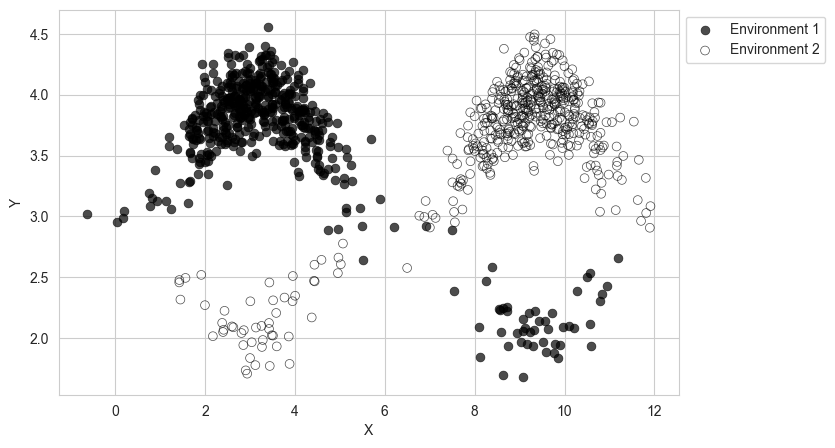

In [96]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=dtr[dtr["E"] == dtr["E"].unique()[0]],
    x="X", y="Y",
    color="black", edgecolor="black",
    s=40, alpha=0.7, label="Environment 1"
)

sns.scatterplot(
    data=dtr[dtr["E"] == dtr["E"].unique()[1]],
    x="X", y="Y",
    facecolors='none', edgecolor="black",
    s=40, alpha=0.7, label="Environment 2"
)

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

### Default

In [97]:
rf = RandomForestRegressor(n_estimators=n_estimators,
                           min_samples_leaf=min_samples_leaf,
                           random_state=random_state,
                           )
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

Environment 0 MSE: 0.2658331540385547
Environment 1 MSE: 0.25039047833360584


np.float64(0.2658331540385547)

In [98]:
min_xplvar(Ytr, fitted_rf, Etr, verbose=True)

Environment 0 explained variance: 13.399396427971896
Environment 1 explained variance: 13.365837428680667


np.float64(13.365837428680667)

### Maximin - Local

In [99]:
rf_adaxt = RandomForest("MaximinLocal",
                        n_estimators=n_estimators,
                        min_samples_leaf=min_samples_leaf,
                        seed=random_state,
                        #max_depth=1
                        )
rf_adaxt.fit(Xtr, Ytr, Etr)
fitted_adaxt = rf_adaxt.predict(Xtr)

[0.31676753 0.34926356]
-------------------------------------------------------
Unique env:  (array([0, 1], dtype=int32), array([500, 500]))
Worst env:  1
Best score:  0.08619372581055385
Best split:  500
Impurity:  0.34926355923820485 0.07318366842727328 0.08783463394898564 56.0 444.0
False Preds_all:  1000 (array([2.16865516, 3.79247174]), array([500, 500]))
Env errs:  [2.79088243 0.08619373]
-------------------------------------------------------
Unique env:  (array([0, 1], dtype=int32), array([ 56, 444]))
Worst env:  0
Best score:  0.03959236123372045
Best split:  16
Impurity:  2.3139362062086666 0.050810401453117215 0.036532895719339514 12.0 44.0
False Preds_all:  500 (array([2.11523762, 2.16865516, 3.24579798]), array([484, 500,  16]))
Env errs:  [0.03959236 2.89313558]
-------------------------------------------------------
Unique env:  (array([0, 1], dtype=int32), array([ 44, 440]))
Worst env:  1
Best score:  0.06006505039738951
Best split:  433
Impurity:  2.919100340938947 0.0

In [100]:
preds_adaxt = rf_adaxt.predict(Xtr_sorted)

In [101]:
max_mse(Ytr, fitted_adaxt, Etr, verbose=True)

Environment 0 MSE: 0.40017487990122047
Environment 1 MSE: 0.3601482834357435


np.float64(0.40017487990122047)

In [102]:
min_xplvar(Ytr, fitted_adaxt, Etr, verbose=True)

Environment 0 explained variance: 13.26505470210923
Environment 1 explained variance: 13.256079623578529


np.float64(13.256079623578529)

### Maximin - Global

In [103]:
rf_adaxt_global = RandomForest("MaximinGlobal",
                               n_estimators=n_estimators,
                               min_samples_leaf=min_samples_leaf,
                               seed=random_state,
                               #max_depth=1
                               )
rf_adaxt_global.fit(Xtr, Ytr, Etr)
fitted_adaxt_global = rf_adaxt_global.predict(Xtr)

[0.31676753 0.34926356]
-------------------------------------------------------
Unique env:  (array([0, 1], dtype=int32), array([500, 500]))
Worst env:  1
Best score:  0.08619372581055385
Best split:  500
Impurity:  0.34926355923820485 0.07318366842727328 0.08783463394898564 56.0 444.0
False Preds_all:  1000 (array([2.16865516, 3.79247174]), array([500, 500]))
Env errs:  [2.79088243 0.08619373]
-------------------------------------------------------
Unique env:  (array([0, 1], dtype=int32), array([ 56, 444]))
Worst env:  0
Best score:  0.03959236123372045
Best split:  16
Impurity:  2.3139362062086666 0.050810401453117215 0.036532895719339514 12.0 44.0
False Preds_all:  500 (array([2.11523762, 2.16865516, 3.24579798]), array([484, 500,  16]))
Env errs:  [2.53615592 2.57730096]
-------------------------------------------------------
Unique env:  (array([0, 1], dtype=int32), array([ 44, 440]))
Worst env:  1
Best score:  0.06006505039738951
Best split:  433
Impurity:  2.919100340938947 0.0

In [104]:
preds_adaxt_global = rf_adaxt_global.predict(Xtr_sorted)

In [105]:
max_mse(Ytr, fitted_adaxt_global, Etr, verbose=True)

Environment 0 MSE: 0.29135585401073844
Environment 1 MSE: 0.32650732442445285


np.float64(0.32650732442445285)

In [106]:
min_xplvar(Ytr, fitted_adaxt_global, Etr, verbose=True)

Environment 0 explained variance: 13.373873727999712
Environment 1 explained variance: 13.289720582589819


np.float64(13.289720582589819)

In [107]:
rf_magging = MaggingRF_PB(n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          random_state=random_state,
                          backend='sklearn')
fitted_magging, preds_magging = rf_magging.fit_predict_magging(Xtr, Ytr, Etr, Xtr_sorted)
wmag = rf_magging.get_weights()

In [108]:
max_mse(Ytr, fitted_magging, Etr, verbose=True)

Environment 0 MSE: 0.6989502696751357
Environment 1 MSE: 0.7371561350967135


np.float64(0.7371561350967135)

In [109]:
min_xplvar(Ytr, fitted_magging, Etr, verbose=True)

Environment 0 explained variance: 12.966279312335315
Environment 1 explained variance: 12.879071771917559


np.float64(12.879071771917559)

In [110]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_magging"] = preds_magging
dtr["fitted_adaXT"] = preds_adaxt
dtr["fitted_adaXT_global"] = preds_adaxt_global
dtr["fitted_rf"] = preds_rf

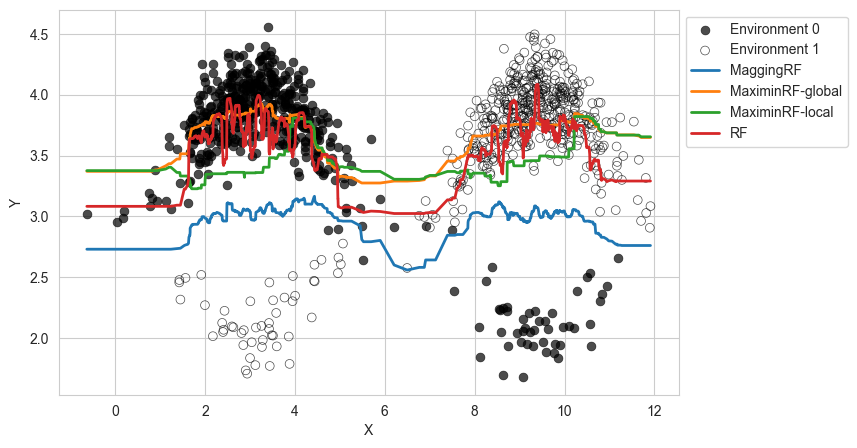

In [111]:
plt.figure(figsize=(8, 5))

scatter1 = sns.scatterplot(
    data=dtr[dtr["E"] == 0],
    x="X", y="Y",
    color="black", edgecolor="black",
    s=40, alpha=0.7,
    label="Environment 0"
)

scatter2 = sns.scatterplot(
    data=dtr[dtr["E"] == 1],
    x="X", y="Y",
    facecolors='none', edgecolor="black",
    s=40, alpha=0.7,
    label="Environment 1"
)

line1, = plt.plot(dtr["X_sorted"], dtr["fitted_magging"], linewidth=2, label="MaggingRF")
line2, = plt.plot(dtr["X_sorted"], dtr["fitted_adaXT_global"], linewidth=2, label="MaximinRF-global")
line3, = plt.plot(dtr["X_sorted"], dtr["fitted_adaXT"], linewidth=2, label="MaximinRF-local")
line4, = plt.plot(dtr["X_sorted"], dtr["fitted_rf"], linewidth=2, label="RF")

handles, labels = scatter1.get_legend_handles_labels()
method_legend = [line1, line2, line3, line4]

plt.legend(handles=handles + method_legend, labels=labels, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


## Setting 2

In [164]:
dtr = gen_data_v3(n=1000, setting=2)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 10
random_state = 42

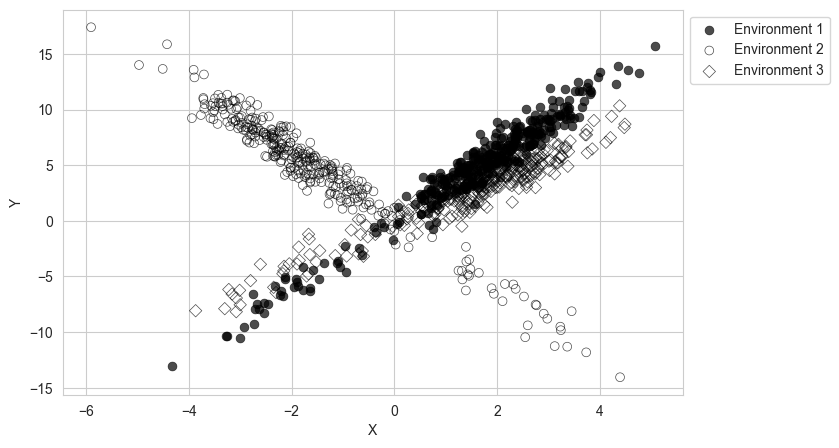

In [165]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=dtr[dtr["E"] == dtr["E"].unique()[0]],
    x="X", y="Y",
    color="black", edgecolor="black",
    s=40, alpha=0.7, label="Environment 1",
    marker="o"
)

sns.scatterplot(
    data=dtr[dtr["E"] == dtr["E"].unique()[1]],
    x="X", y="Y",
    facecolors='none', edgecolor="black",
    s=40, alpha=0.7, label="Environment 2",
    marker="o"
)

sns.scatterplot(
    data=dtr[dtr["E"] == dtr["E"].unique()[2]],
    x="X", y="Y",
    facecolors="none", edgecolor="black",
    s=40, alpha=0.7, label="Environment 3",
    marker="D"
)

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


### Default

In [114]:
rf = RandomForestRegressor(n_estimators=n_estimators,
                           min_samples_leaf=min_samples_leaf,
                           random_state=random_state,
                           )
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

Environment 0 MSE: 15.54433779268481
Environment 1 MSE: 19.821635055784366
Environment 2 MSE: 8.063128260808815


np.float64(19.821635055784366)

In [115]:
min_xplvar(Ytr, fitted_rf, Etr, verbose=True)

Environment 0 explained variance: 30.62266572944335
Environment 1 explained variance: 28.21041725282917
Environment 2 explained variance: 10.216617670128928


np.float64(10.216617670128928)

### Maximin - Local

In [116]:
rf_adaxt = RandomForest("MaximinLocal",
                        n_estimators=n_estimators,
                        min_samples_leaf=min_samples_leaf,
                        seed=random_state,
                        #max_depth=1
                        )
rf_adaxt.fit(Xtr, Ytr, Etr)
fitted_adaxt = rf_adaxt.predict(Xtr)

[25.22667469 23.88388912  9.97043305]
-------------------------------------------------------
Unique env:  (array([0, 1, 2], dtype=int32), array([336, 344, 319]))
Worst env:  0
Best score:  8.169363612041407
Best split:  367
Impurity:  25.226674687062467 7.975936769343927 8.197750486566974 43.0 293.0
False Preds_all:  999 (array([-5.9668358 ,  6.30496334]), array([367, 632]))
Env errs:  [  8.16936361 154.84889761   9.5785839 ]
-------------------------------------------------------
Unique env:  (array([0, 1, 2], dtype=int32), array([293,  49, 290]))
Worst env:  1
Best score:  5.781623005046821
Best split:  63
Impurity:  132.65439176125886 1.3143061907233748 8.375548897234628 18.0 31.0
False Preds_all:  632 (array([-6.82175732, -5.9668358 , -0.6677255 ]), array([569, 367,  63]))
Env errs:  [173.99705113   5.78162301 114.01735551]
-------------------------------------------------------
Unique env:  (array([0, 1, 2], dtype=int32), array([267,  31, 271]))
Worst env:  0
Best score:  2.88053

In [117]:
preds_adaxt = rf_adaxt.predict(Xtr_sorted)

In [118]:
max_mse(Ytr, fitted_adaxt, Etr, verbose=True)

Environment 0 MSE: 21.418064161205987
Environment 1 MSE: 20.66386329203063
Environment 2 MSE: 12.253725929176461


np.float64(21.418064161205987)

In [119]:
min_xplvar(Ytr, fitted_adaxt, Etr, verbose=True)

Environment 0 explained variance: 24.748939360922176
Environment 1 explained variance: 27.368189016582907
Environment 2 explained variance: 6.026020001761282


np.float64(6.026020001761282)

### Maximin - Global

In [120]:
rf_adaxt_global = RandomForest("MaximinGlobal",
                               n_estimators=n_estimators,
                               min_samples_leaf=min_samples_leaf,
                               seed=random_state,
                               #max_depth=1
                               )
rf_adaxt_global.fit(Xtr, Ytr, Etr)
fitted_adaxt_global = rf_adaxt_global.predict(Xtr)

[25.22667469 23.88388912  9.97043305]
-------------------------------------------------------
Unique env:  (array([0, 1, 2], dtype=int32), array([336, 344, 319]))
Worst env:  0
Best score:  8.169363612041407
Best split:  367
Impurity:  25.226674687062467 7.975936769343927 8.197750486566974 43.0 293.0
False Preds_all:  999 (array([-5.9668358 ,  6.30496334]), array([367, 632]))
Env errs:  [  8.16936361 154.84889761   9.5785839 ]
-------------------------------------------------------
Unique env:  (array([0, 1, 2], dtype=int32), array([293,  49, 290]))
Worst env:  1
Best score:  5.781623005046821
Best split:  63
Impurity:  132.65439176125886 1.3143061907233748 8.375548897234628 18.0 31.0
False Preds_all:  632 (array([-6.82175732, -5.9668358 , -0.6677255 ]), array([569, 367,  63]))
Env errs:  [152.75030137 136.77690439 104.41023428]
-------------------------------------------------------
Unique env:  (array([0, 1, 2], dtype=int32), array([267,  31, 271]))
Worst env:  0
Best score:  2.88053

In [121]:
preds_adaxt_global = rf_adaxt_global.predict(Xtr_sorted)

In [122]:
max_mse(Ytr, fitted_adaxt_global, Etr, verbose=True)

Environment 0 MSE: 22.83401250523225
Environment 1 MSE: 18.853147665084485
Environment 2 MSE: 14.566510858404703


np.float64(22.83401250523225)

In [123]:
min_xplvar(Ytr, fitted_adaxt_global, Etr, verbose=True)

Environment 0 explained variance: 23.332991016895914
Environment 1 explained variance: 29.17890464352905
Environment 2 explained variance: 3.71323507253304


np.float64(3.71323507253304)

### Magging

In [124]:
rf_magging = MaggingRF_PB(n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          random_state=random_state,
                          backend='sklearn')
fitted_magging, preds_magging = rf_magging.fit_predict_magging(Xtr, Ytr, Etr, Xtr_sorted)
wmag = rf_magging.get_weights()

In [125]:
max_mse(Ytr, fitted_magging, Etr, verbose=True)

Environment 0 MSE: 45.37354462777506
Environment 1 MSE: 47.469513390482796
Environment 2 MSE: 18.356035877630802


np.float64(47.469513390482796)

In [126]:
min_xplvar(Ytr, fitted_magging, Etr, verbose=True)

Environment 0 explained variance: 0.7934588943531011
Environment 1 explained variance: 0.5625389181307412
Environment 2 explained variance: -0.07628994669305911


np.float64(-0.07628994669305911)

In [127]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_magging"] = preds_magging
dtr["fitted_adaXT"] = preds_adaxt
dtr["fitted_adaXT_global"] = preds_adaxt_global
dtr["fitted_rf"] = preds_rf

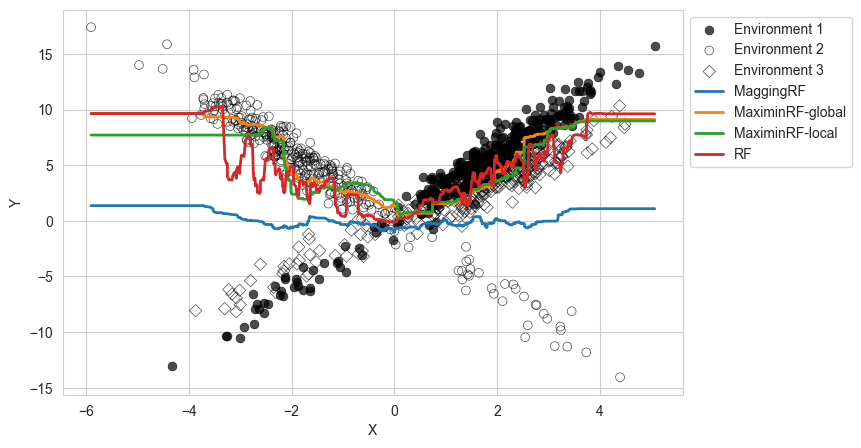

In [128]:
plt.figure(figsize=(8, 5))

scatter1 = sns.scatterplot(
    data=dtr[dtr["E"] == dtr["E"].unique()[0]],
    x="X", y="Y",
    color="black", edgecolor="black",
    s=40, alpha=0.7, label="Environment 1",
    marker="o"
)

sns.scatterplot(
    data=dtr[dtr["E"] == dtr["E"].unique()[1]],
    x="X", y="Y",
    facecolors='none', edgecolor="black",
    s=40, alpha=0.7, label="Environment 2",
    marker="o"
)

sns.scatterplot(
    data=dtr[dtr["E"] == dtr["E"].unique()[2]],
    x="X", y="Y",
    facecolors="none", edgecolor="black",
    s=40, alpha=0.7, label="Environment 3",
    marker="D"
)

line1, = plt.plot(dtr["X_sorted"], dtr["fitted_magging"], linewidth=2, label="MaggingRF")
line2, = plt.plot(dtr["X_sorted"], dtr["fitted_adaXT_global"], linewidth=2, label="MaximinRF-global")
line3, = plt.plot(dtr["X_sorted"], dtr["fitted_adaXT"], linewidth=2, label="MaximinRF-local")
line4, = plt.plot(dtr["X_sorted"], dtr["fitted_rf"], linewidth=2, label="RF")

handles, labels = scatter1.get_legend_handles_labels()
method_legend = [line1, line2, line3, line4]

plt.legend(handles=handles + method_legend, labels=labels, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


## Setting 3

In [129]:
dtr = gen_data_v4(n_easy=1000, n_hard=1000)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 10
random_state = 42

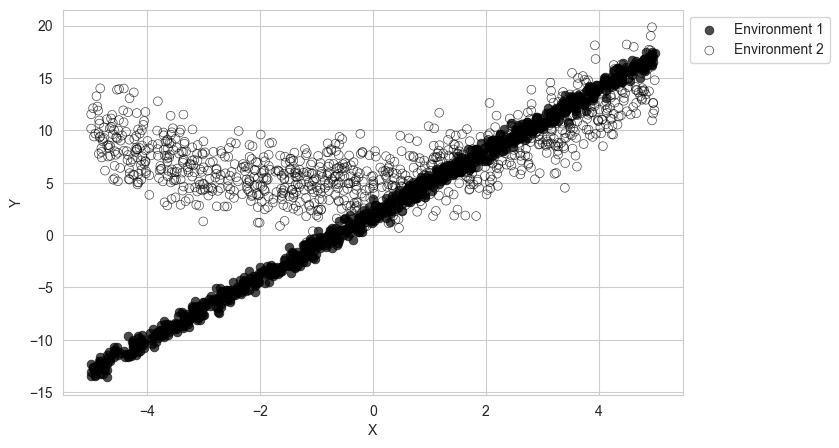

In [130]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=dtr[dtr["E"] == dtr["E"].unique()[0]],
    x="X", y="Y",
    color="black", edgecolor="black",
    s=40, alpha=0.7, label="Environment 1",
    marker="o"
)

sns.scatterplot(
    data=dtr[dtr["E"] == dtr["E"].unique()[1]],
    x="X", y="Y",
    facecolors='none', edgecolor="black",
    s=40, alpha=0.7, label="Environment 2",
    marker="o"
)

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


### Default

In [131]:
rf = RandomForestRegressor(n_estimators=n_estimators,
                           min_samples_leaf=min_samples_leaf,
                           random_state=random_state,
                           )
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

Environment 0 MSE: 18.338024547637374
Environment 1 MSE: 20.544226641874104


np.float64(20.544226641874104)

In [132]:
min_xplvar(Ytr, fitted_rf, Etr, verbose=True)

Environment 0 explained variance: 61.02061526356249
Environment 1 explained variance: 47.784367469135276


np.float64(47.784367469135276)

### Maximin - Local

In [133]:
rf_adaxt = RandomForest("MaximinLocal",
                        n_estimators=n_estimators,
                        min_samples_leaf=min_samples_leaf,
                        seed=random_state,
                        #max_depth=1
                        )
rf_adaxt.fit(Xtr, Ytr, Etr)
fitted_adaxt = rf_adaxt.predict(Xtr)

[83.98871618 18.45819138]
-------------------------------------------------------
Unique env:  (array([0, 1], dtype=int32), array([ 977, 1023]))
Worst env:  0
Best score:  18.675955686882006
Best split:  1025
Impurity:  83.98871618392435 19.3225283282658 18.014657788655107 494.0 483.0
False Preds_all:  2000 (array([-5.46252984,  9.66056663]), array([1025,  975]))
Env errs:  [18.67595569 81.57378313]
-------------------------------------------------------
Unique env:  (array([0, 1], dtype=int32), array([483, 492]))
Worst env:  1
Best score:  5.6882953232362405
Best split:  651
Impurity:  13.59090634312975 6.078664874843303 4.885734319621722 331.0 161.0
False Preds_all:  975 (array([-5.46252984,  7.0665924 , 12.87242756]), array([1025,  651,  324]))
Env errs:  [7.21661555 5.68829532]
-------------------------------------------------------
Unique env:  (array([0, 1], dtype=int32), array([163, 161]))
Worst env:  0
Best score:  0.6408923479295074
Best split:  141
Impurity:  4.84282071720422

In [134]:
preds_adaxt = rf_adaxt.predict(Xtr_sorted)

In [135]:
max_mse(Ytr, fitted_adaxt, Etr, verbose=True)

Environment 0 MSE: 14.910610875687404
Environment 1 MSE: 39.16819104223182


np.float64(39.16819104223182)

In [136]:
min_xplvar(Ytr, fitted_adaxt, Etr, verbose=True)

Environment 0 explained variance: 64.44802893551247
Environment 1 explained variance: 29.160403068777562


np.float64(29.160403068777562)

### Maximin - Global

In [137]:
rf_adaxt_global = RandomForest("MaximinGlobal",
                               n_estimators=n_estimators,
                               min_samples_leaf=min_samples_leaf,
                               seed=random_state,
                               #max_depth=1
                               )
rf_adaxt_global.fit(Xtr, Ytr, Etr)
fitted_adaxt_global = rf_adaxt_global.predict(Xtr)

[83.98871618 18.45819138]
-------------------------------------------------------
Unique env:  (array([0, 1], dtype=int32), array([ 977, 1023]))
Worst env:  0
Best score:  18.675955686882006
Best split:  1025
Impurity:  83.98871618392435 19.3225283282658 18.014657788655107 494.0 483.0
False Preds_all:  2000 (array([-5.46252984,  9.66056663]), array([1025,  975]))
Env errs:  [18.67595569 81.57378313]
-------------------------------------------------------
Unique env:  (array([0, 1], dtype=int32), array([483, 492]))
Worst env:  1
Best score:  5.6882953232362405
Best split:  651
Impurity:  13.59090634312975 6.078664874843303 4.885734319621722 331.0 161.0
False Preds_all:  975 (array([-5.46252984,  7.0665924 , 12.87242756]), array([1025,  651,  324]))
Env errs:  [13.33772191 77.7731139 ]
-------------------------------------------------------
Unique env:  (array([0, 1], dtype=int32), array([163, 161]))
Worst env:  1
Best score:  3.36652942611051
Best split:  191
Impurity:  4.88573431962172

In [138]:
preds_adaxt_global = rf_adaxt_global.predict(Xtr_sorted)

In [139]:
max_mse(Ytr, fitted_adaxt_global, Etr, verbose=True)

Environment 0 MSE: 21.80494543032746
Environment 1 MSE: 39.14217995753301


np.float64(39.14217995753301)

In [140]:
min_xplvar(Ytr, fitted_adaxt_global, Etr, verbose=True)

Environment 0 explained variance: 57.5536943808724
Environment 1 explained variance: 29.18641415347637


np.float64(29.18641415347637)

### Magging

In [141]:
rf_magging = MaggingRF_PB(n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          random_state=random_state,
                          backend='sklearn')
fitted_magging, preds_magging = rf_magging.fit_predict_magging(Xtr, Ytr, Etr, Xtr_sorted)
wmag = rf_magging.get_weights()

In [142]:
max_mse(Ytr, fitted_magging, Etr, verbose=True)

Environment 0 MSE: 26.494899682199517
Environment 1 MSE: 19.51311075348832


np.float64(26.494899682199517)

In [143]:
min_xplvar(Ytr, fitted_magging, Etr, verbose=True)

Environment 0 explained variance: 52.86374012900035
Environment 1 explained variance: 48.81548335752106


np.float64(48.81548335752106)

In [144]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_magging"] = preds_magging
dtr["fitted_adaXT"] = preds_adaxt
dtr["fitted_adaXT_global"] = preds_adaxt_global
dtr["fitted_rf"] = preds_rf

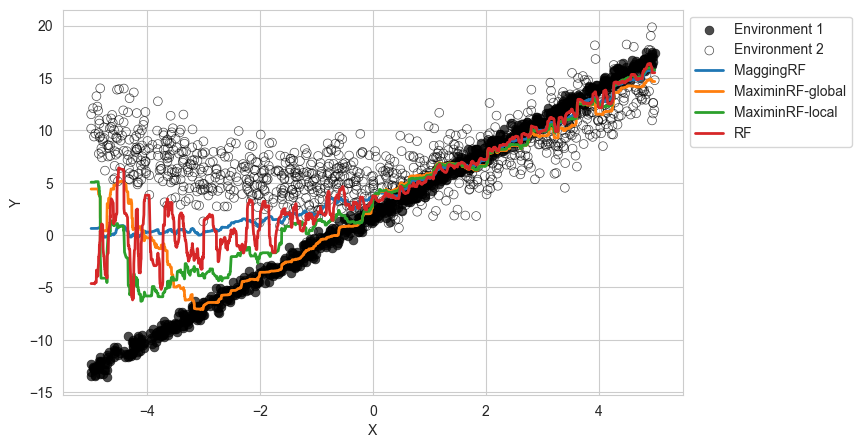

In [145]:
plt.figure(figsize=(8, 5))

scatter1 = sns.scatterplot(
    data=dtr[dtr["E"] == dtr["E"].unique()[0]],
    x="X", y="Y",
    color="black", edgecolor="black",
    s=40, alpha=0.7, label="Environment 1",
    marker="o"
)

sns.scatterplot(
    data=dtr[dtr["E"] == dtr["E"].unique()[1]],
    x="X", y="Y",
    facecolors='none', edgecolor="black",
    s=40, alpha=0.7, label="Environment 2",
    marker="o"
)

line1, = plt.plot(dtr["X_sorted"], dtr["fitted_magging"], linewidth=2, label="MaggingRF")
line2, = plt.plot(dtr["X_sorted"], dtr["fitted_adaXT_global"], linewidth=2, label="MaximinRF-global")
line3, = plt.plot(dtr["X_sorted"], dtr["fitted_adaXT"], linewidth=2, label="MaximinRF-local")
line4, = plt.plot(dtr["X_sorted"], dtr["fitted_rf"], linewidth=2, label="RF")

handles, labels = scatter1.get_legend_handles_labels()
method_legend = [line1, line2, line3, line4]

plt.legend(handles=handles + method_legend, labels=labels, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


## Setting 4

In [167]:
# If you add +10 in the generating function, magging performs better
dtr = gen_data_v5(n_samples=1000, adv_fraction=0.1, noise_var_env2=10.0)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 10
random_state = 42

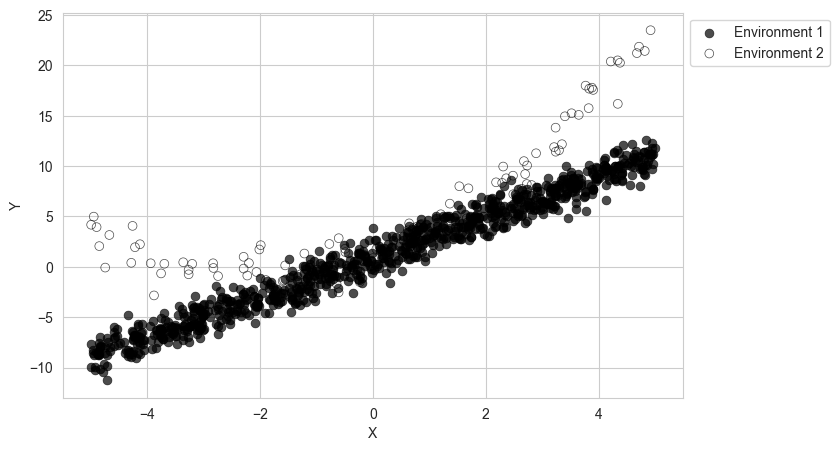

In [168]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=dtr[dtr["E"] == dtr["E"].unique()[0]],
    x="X", y="Y",
    color="black", edgecolor="black",
    s=40, alpha=0.7, label="Environment 1",
    marker="o"
)

sns.scatterplot(
    data=dtr[dtr["E"] == dtr["E"].unique()[1]],
    x="X", y="Y",
    facecolors='none', edgecolor="black",
    s=40, alpha=0.7, label="Environment 2",
    marker="o"
)

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


### Default

In [169]:
rf = RandomForestRegressor(n_estimators=n_estimators,
                           min_samples_leaf=min_samples_leaf,
                           random_state=random_state,
                           )
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

Environment 0 MSE: 1.341405668190411
Environment 1 MSE: 24.095885456625506


np.float64(24.095885456625506)

In [170]:
min_xplvar(Ytr, fitted_rf, Etr, verbose=True)

Environment 0 explained variance: 33.563105421166185
Environment 1 explained variance: 55.52719722375353


np.float64(33.563105421166185)

### Maximin - Local

In [171]:
rf_adaxt = RandomForest("MaximinLocal",
                        n_estimators=n_estimators,
                        min_samples_leaf=min_samples_leaf,
                        seed=random_state,
                        #max_depth=1
                        )
rf_adaxt.fit(Xtr, Ytr, Etr)
fitted_adaxt = rf_adaxt.predict(Xtr)

[31.91531947 45.99500947]
-------------------------------------------------------
Unique env:  (array([0, 1], dtype=int32), array([894, 106]))
Worst env:  1
Best score:  10.706015698936026
Best split:  590
Impurity:  45.99500946785648 5.565575347573742 22.077292839828356 73.0 33.0
False Preds_all:  1000 (array([ 1.30236087, 12.92006588]), array([590, 410]))
Env errs:  [28.85973613 10.7060157 ]
-------------------------------------------------------
Unique env:  (array([0, 1], dtype=int32), array([377,  33]))
Worst env:  0
Best score:  1.8433639088070257
Best split:  213
Impurity:  34.478675067569604 1.7361216026753878 1.9582663796623523 195.0 182.0
False Preds_all:  410 (array([1.30236087, 5.79747234, 9.28046286]), array([590, 213, 197]))
Env errs:  [ 1.84336391 41.30340799]
-------------------------------------------------------
Unique env:  (array([0, 1], dtype=int32), array([182,  15]))
Worst env:  1
Best score:  2.221492226740766
Best split:  68
Impurity:  74.22380573455581 3.22695

In [172]:
preds_adaxt = rf_adaxt.predict(Xtr_sorted)

In [173]:
max_mse(Ytr, fitted_adaxt, Etr, verbose=True)

Environment 0 MSE: 11.51031859743685
Environment 1 MSE: 19.959569709955716


np.float64(19.959569709955716)

### Maximin - Global

In [174]:
rf_adaxt_global = RandomForest("MaximinGlobal",
                               n_estimators=n_estimators,
                               min_samples_leaf=min_samples_leaf,
                               seed=random_state,
                               #max_depth=1
                               )
rf_adaxt_global.fit(Xtr, Ytr, Etr)
fitted_adaxt_global = rf_adaxt_global.predict(Xtr)

[31.91531947 45.99500947]
-------------------------------------------------------
Unique env:  (array([0, 1], dtype=int32), array([894, 106]))
Worst env:  1
Best score:  10.706015698936026
Best split:  590
Impurity:  45.99500946785648 5.565575347573742 22.077292839828356 73.0 33.0
False Preds_all:  1000 (array([ 1.30236087, 12.92006588]), array([590, 410]))
Env errs:  [28.85973613 10.7060157 ]
-------------------------------------------------------
Unique env:  (array([0, 1], dtype=int32), array([377,  33]))
Worst env:  0
Best score:  1.8433639088070257
Best split:  213
Impurity:  34.478675067569604 1.7361216026753878 1.9582663796623523 195.0 182.0
False Preds_all:  410 (array([1.30236087, 5.79747234, 9.28046286]), array([590, 213, 197]))
Env errs:  [15.09741812 16.69150438]
-------------------------------------------------------
Unique env:  (array([0, 1], dtype=int32), array([182,  15]))
Worst env:  1
Best score:  2.221492226740766
Best split:  68
Impurity:  74.22380573455581 3.22695

In [175]:
preds_adaxt_global = rf_adaxt_global.predict(Xtr_sorted)

In [176]:
max_mse(Ytr, fitted_adaxt_global, Etr, verbose=True)

Environment 0 MSE: 10.443461416054205
Environment 1 MSE: 19.57829851043157


np.float64(19.57829851043157)

In [177]:
min_xplvar(Ytr, fitted_adaxt_global, Etr, verbose=True)

Environment 0 explained variance: 24.46104967330239
Environment 1 explained variance: 60.04478416994748


np.float64(24.46104967330239)

### Magging

In [178]:
rf_magging = MaggingRF_PB(n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          random_state=random_state,
                          backend='sklearn')
fitted_magging, preds_magging = rf_magging.fit_predict_magging(Xtr, Ytr, Etr, Xtr_sorted)
wmag = rf_magging.get_weights()

In [179]:
max_mse(Ytr, fitted_magging, Etr, verbose=True)

Environment 0 MSE: 0.9140731953836674
Environment 1 MSE: 34.83349330875974


np.float64(34.83349330875974)

In [180]:
min_xplvar(Ytr, fitted_magging, Etr, verbose=True)

Environment 0 explained variance: 33.99043789397293
Environment 1 explained variance: 44.7895893716193


np.float64(33.99043789397293)

In [181]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_magging"] = preds_magging
dtr["fitted_adaXT"] = preds_adaxt
dtr["fitted_adaXT_global"] = preds_adaxt_global
dtr["fitted_rf"] = preds_rf

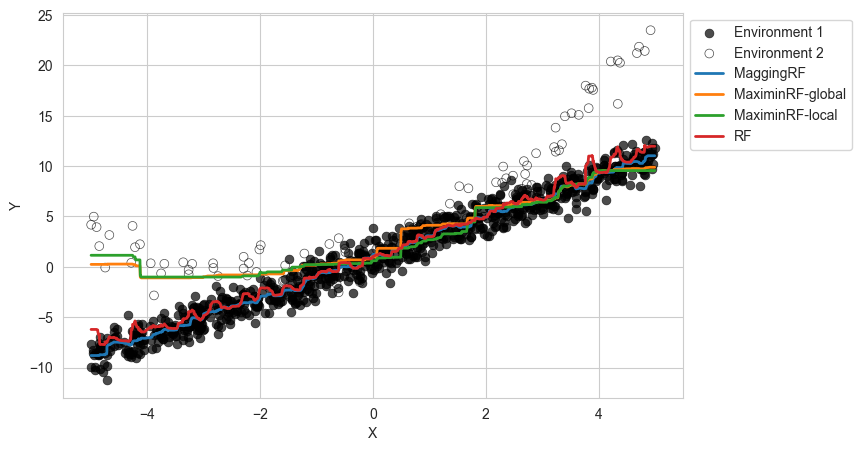

In [182]:
plt.figure(figsize=(8, 5))

scatter1 = sns.scatterplot(
    data=dtr[dtr["E"] == dtr["E"].unique()[0]],
    x="X", y="Y",
    color="black", edgecolor="black",
    s=40, alpha=0.7, label="Environment 1",
    marker="o"
)

sns.scatterplot(
    data=dtr[dtr["E"] == dtr["E"].unique()[1]],
    x="X", y="Y",
    facecolors='none', edgecolor="black",
    s=40, alpha=0.7, label="Environment 2",
    marker="o"
)

line1, = plt.plot(dtr["X_sorted"], dtr["fitted_magging"], linewidth=2, label="MaggingRF")
line2, = plt.plot(dtr["X_sorted"], dtr["fitted_adaXT_global"], linewidth=2, label="MaximinRF-global")
line3, = plt.plot(dtr["X_sorted"], dtr["fitted_adaXT"], linewidth=2, label="MaximinRF-local")
line4, = plt.plot(dtr["X_sorted"], dtr["fitted_rf"], linewidth=2, label="RF")

handles, labels = scatter1.get_legend_handles_labels()
method_legend = [line1, line2, line3, line4]

plt.legend(handles=handles + method_legend, labels=labels, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()
